In [ ]:
!pip install datasets transformers torch scikit-learn matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 491.4/491.4 kB 8.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 53.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 39.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 41.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 849.2 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 100.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━


# Fake News Detection Project using Hugging Face

This project implements a fake news detection system using Hugging Face datasets and transformers.
The project addresses the following Key Performance Indicators (KPIs):
1. Design a computing-based solution for fake news detection
2. Implement the solution using appropriate tools and frameworks
3. Evaluate the solution's effectiveness
4. Address ethical and legal considerations in computing practice


In [ ]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split

# Import Hugging Face libraries
from datasets import load_dataset
from transformers import (
    AutoTokenizer,
    AutoModelForSequenceClassification,
    TrainingArguments,
    Trainer
)
import torch
from torch.utils.data import Dataset

# Set random seed for reproducibility
torch.manual_seed(42)
np.random.seed(42)

# PART 1: DESIGN THE SOLUTION


---



Design Overview:
1. Load a fake news dataset from Hugging Face
2. Preprocess and prepare the data
3. Fine-tune a pre-trained transformer model
4. Evaluate the model's performance
5. Address ethical considerations







# PART 2: IMPLEMENT THE SOLUTION


---



In [ ]:
# Load the dataset
# We use the "ErfanMoosaviMonazzah/fake-news-detection-dataset-English" dataset
print("Loading dataset...")
dataset = load_dataset("ErfanMoosaviMonazzah/fake-news-detection-dataset-English")
print(f"Dataset loaded with {len(dataset['train'])} training samples.")

# Inspect the dataset
print("\nDataset structure:")
print(dataset)

# Display sample data
print("\nSample from the training set:")
print(dataset['train'][0])

# Check class distribution
labels = dataset['train']['label']
label_counts = pd.Series(labels).value_counts()
print("\nClass distribution in training set:")
print(label_counts)

Loading dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


Dataset loaded with 30000 training samples.

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 8267
    })
})

Sample from the training set:
{'Unnamed: 0': 2619, 'title': "Ex-CIA head says Trump remarks on Russia interference 'disgraceful'", 'text': 'Former CIA director John Brennan on Friday criticized as “disgraceful” President Donald Trump’s efforts to play down U.S. intelligence agencies’ assessment that Russia meddled in the 2016 U.S. election. Trump’s administration has been dogged by investigations into allegations of Russian interference in last year’s U.S. presidential election and possible ties with his campaign team

In [ ]:
# ── Quick EDA for the HF fake‑news dataset ──────────────────────────────────
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.rcParams["figure.figsize"] = (8,4)

# 1) Convert the split you care about to a DataFrame
train_df = dataset["train"].to_pandas()
train_df.drop(columns=["Unnamed: 0"], inplace=True)   # remove stray CSV index




In [ ]:
# 2) Basic shape & nulls
print(f"Rows: {len(train_df)} | Columns: {train_df.shape[1]}")
print("\nMissing values per column:\n", train_df.isna().sum())



Rows: 30000 | Columns: 5

Missing values per column:
 title      0
text       0
subject    0
date       0
label      0
dtype: int64


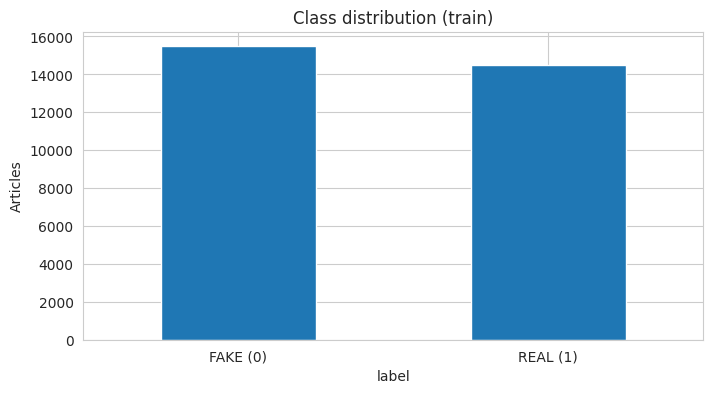

In [ ]:
# 3) Class distribution
class_counts = train_df["label"].value_counts().sort_index()
class_counts.plot(kind="bar")
plt.xticks([0,1], ["FAKE (0)", "REAL (1)"], rotation=0)
plt.ylabel("Articles"); plt.title("Class distribution (train)")
plt.show()



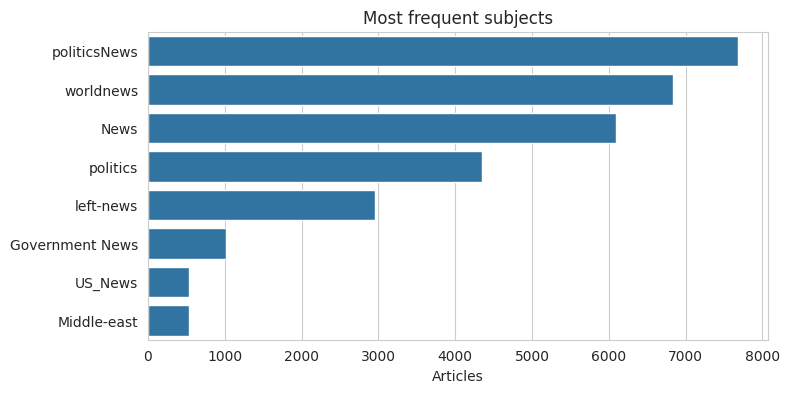

In [ ]:
# 4) Top subjects
top_subjects = train_df["subject"].value_counts().head(8)
sns.barplot(x=top_subjects.values, y=top_subjects.index)
plt.title("Most frequent subjects"); plt.xlabel("Articles"); plt.ylabel("")
plt.show()



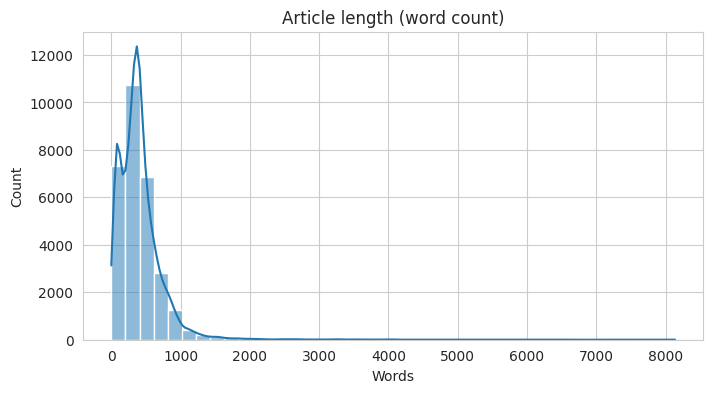

In [ ]:
# 5) Quick text‑length look
train_df["word_count"] = train_df["text"].str.split().apply(len)
sns.histplot(train_df["word_count"], bins=40, kde=True)
plt.title("Article length (word count)"); plt.xlabel("Words")
plt.show()

In [ ]:





# Data preprocessing
# Select the pretrained model - using RoBERTa, which performs well for text classification
MODEL_NAME = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(MODEL_NAME)

# Create a function to tokenize the text data
def tokenize_function(examples):
    # Combine title and text for better context
    texts = [title + " " + text for title, text in zip(examples["title"], examples["text"])]
    return tokenizer(texts, padding="max_length", truncation=True, max_length=512)

# Tokenize the dataset
print("\nTokenizing the dataset...")
tokenized_datasets = dataset.map(tokenize_function, batched=True)

# Make sure the dataset has the right format for the model
tokenized_datasets = tokenized_datasets.remove_columns(['title', 'text', 'subject', 'date'])
if 'Unnamed: 0' in tokenized_datasets['train'].column_names:
    tokenized_datasets = tokenized_datasets.remove_columns(['Unnamed: 0'])
tokenized_datasets = tokenized_datasets.rename_column("label", "labels")
tokenized_datasets.set_format("torch")

# Create a smaller subset for faster training - for demonstration purposes
# In production, you would use the full dataset
train_dataset = tokenized_datasets["train"].shuffle(seed=42).select(range(5000))
eval_dataset = tokenized_datasets["validation"].shuffle(seed=42).select(range(500))
test_dataset = tokenized_datasets["test"].shuffle(seed=42).select(range(500))

# Initialize the model
print(f"\nInitializing the {MODEL_NAME} model for sequence classification...")
model = AutoModelForSequenceClassification.from_pretrained(
    MODEL_NAME,
    num_labels=2,
    id2label={0: "FAKE", 1: "REAL"},
    label2id={"FAKE": 0, "REAL": 1}
)

# Set up training arguments - updated to match current transformers API
training_args = TrainingArguments(
    output_dir="./results",
    eval_strategy="epoch",  # Updated from evaluation_strategy
    save_strategy="epoch",  # Updated from save_strategy
    learning_rate=2e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",  # Disable wandb/tensorboard reporting
)

# Define metrics computation function
def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return {"accuracy": accuracy_score(labels, predictions)}

# Initialize trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    compute_metrics=compute_metrics,
)

# Train the model
print("\nTraining the model...")
trainer.train()





Loading dataset...


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/487 [00:00<?, ?B/s]

train.tsv:   0%|          | 0.00/78.4M [00:00<?, ?B/s]

validation.tsv:   0%|          | 0.00/15.5M [00:00<?, ?B/s]

test.tsv:   0%|          | 0.00/22.0M [00:00<?, ?B/s]

Generating train split:   0%|          | 0/30000 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/6000 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/8267 [00:00<?, ? examples/s]

Dataset loaded with 30000 training samples.

Dataset structure:
DatasetDict({
    train: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 30000
    })
    validation: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 6000
    })
    test: Dataset({
        features: ['Unnamed: 0', 'title', 'text', 'subject', 'date', 'label'],
        num_rows: 8267
    })
})

Sample from the training set:
{'Unnamed: 0': 2619, 'title': "Ex-CIA head says Trump remarks on Russia interference 'disgraceful'", 'text': 'Former CIA director John Brennan on Friday criticized as “disgraceful” President Donald Trump’s efforts to play down U.S. intelligence agencies’ assessment that Russia meddled in the 2016 U.S. election. Trump’s administration has been dogged by investigations into allegations of Russian interference in last year’s U.S. presidential election and possible ties with his campaign team

tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/481 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


Tokenizing the dataset...


Map:   0%|          | 0/30000 [00:00<?, ? examples/s]

Map:   0%|          | 0/6000 [00:00<?, ? examples/s]

Map:   0%|          | 0/8267 [00:00<?, ? examples/s]


Initializing the roberta-base model for sequence classification...


Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/499M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at roberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training the model...


Epoch,Training Loss,Validation Loss,Accuracy
1,0.058200,0.000031,1.000000
2,0.000700,0.000014,1.000000
3,0.001300,0.000011,1.000000


TrainOutput(global_step=1875, training_loss=0.016065947239597637, metrics={'train_runtime': 1482.6976, 'train_samples_per_second': 10.117, 'train_steps_per_second': 1.265, 'total_flos': 3946665830400000.0, 'train_loss': 0.016065947239597637, 'epoch': 3.0})

# PART 3: EVALUATE THE SOLUTION


---




Evaluating the model on test dataset...


Test results: {'eval_loss': 0.00011713281855918467, 'eval_accuracy': 1.0, 'eval_runtime': 13.3922, 'eval_samples_per_second': 37.335, 'eval_steps_per_second': 4.704, 'epoch': 3.0}

Generating detailed predictions...

Classification Report:
              precision    recall  f1-score   support

        FAKE       1.00      1.00      1.00       271
        REAL       1.00      1.00      1.00       229

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500


Confusion matrix has been saved as 'confusion_matrix.png'


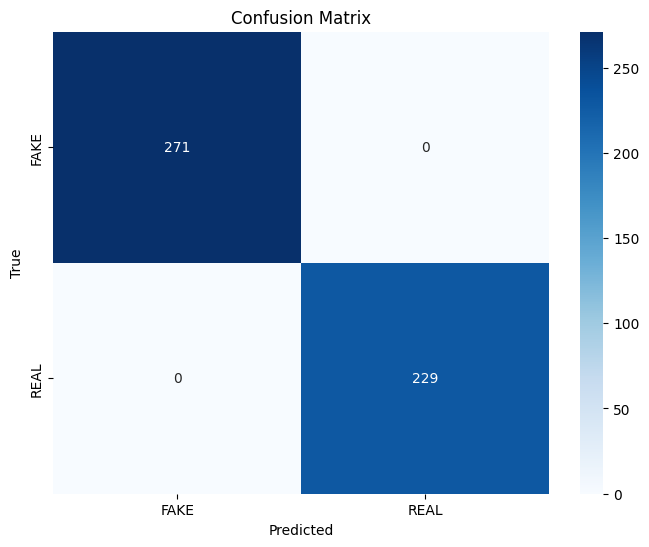

In [ ]:


# Evaluate the model on test set
print("\nEvaluating the model on test dataset...")
evaluation_results = trainer.evaluate(test_dataset)
print(f"Test results: {evaluation_results}")

# Generate predictions for detailed analysis
print("\nGenerating detailed predictions...")
predictions = trainer.predict(test_dataset)
preds = np.argmax(predictions.predictions, axis=-1)
labels = predictions.label_ids

# Generate classification report
print("\nClassification Report:")
target_names = ["FAKE", "REAL"]
print(classification_report(labels, preds, target_names=target_names))

# Create confusion matrix
cm = confusion_matrix(labels, preds)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.savefig('confusion_matrix.png')
print("\nConfusion matrix has been saved as 'confusion_matrix.png'")

# PART 4: ETHICAL AND LEGAL CONSIDERATIONS


---


Ethical Considerations in Fake News Detection:

1. Bias and Fairness:
   - The model may exhibit bias based on the training data
   - We need to ensure fair treatment across political views and sources

2. Transparency:
   - Explainable AI is important to understand why content is classified as fake
   - The system should provide reasoning for its classifications

3. Privacy:
   - Analyzing news content should respect privacy principles
   - User data should not be profiled or stored unnecessarily

4. Accountability:
   - Clear lines of responsibility for false positives/negatives
   - Regular auditing of system decisions

5. Impact on Society:
   - False classifications can have serious consequences
   - The system should minimize harm while maximizing accuracy

6. Human Oversight:
   - Automated classifications should be subject to human review
   - Final decisions should not be solely algorithmic

In [ ]:
import torch

# 1️⃣  Detect a device once and reuse it
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# 2️⃣  Make sure the model (and anything you add later) is on that device
model = model.to(device)          #   <-- if you loaded it earlier, just move it now
model.eval()                      #   good habit for inference

def predict_with_explanation(text: str, title: str = "") -> dict:
    # Combine title & body
    full_text = f"{title} {text}".strip()

    # 3️⃣  Send tokenizer output to the same device
    inputs = tokenizer(
        full_text,
        return_tensors="pt",
        truncation=True,
        max_length=512
    ).to(device)                  #   <-- this is the key line

    with torch.no_grad():
        outputs = model(**inputs)

    # From here everything stays on the GPU, so move to CPU only
    # if you need the raw numbers outside PyTorch:
    probs = torch.softmax(outputs.logits, dim=-1)[0].cpu()

    pred_class = probs.argmax().item()
    confidence = probs[pred_class].item()

    return {
        "prediction": "FAKE" if pred_class == 0 else "REAL",
        "confidence": confidence,
        "needs_review": confidence < 0.70,   # flag low‑confidence cases
    }

# Example
sample_text  = "Scientists discover that drinking water cures all diseases according to a new study."
sample_title = "Water is the miracle cure for everything"

print("\nSample prediction with ethical considerations:")
result = predict_with_explanation(sample_text, sample_title)
print(f"Text: {sample_title} - {sample_text}")
print(f"Prediction: {result['prediction']}")
print(f"Confidence:  {result['confidence']:.2f}")
print(f"Needs human review: {result['needs_review']}")



Sample prediction with ethical considerations:
Text: Water is the miracle cure for everything - Scientists discover that drinking water cures all diseases according to a new study.
Prediction: REAL
Confidence:  1.00
Needs human review: False


# Part 5 : Apriori on subjects + labels

In [ ]:
import pandas as pd
from mlxtend.frequent_patterns import apriori, association_rules

# --- Prepare one‑hot matrix ---------------------------------------------------
train_df = dataset["train"].to_pandas().drop(columns=["Unnamed: 0"])
train_df["label"]   = train_df["label"].map({0: "LABEL_FAKE", 1: "LABEL_REAL"})
train_df["subject"] = "SUBJECT_" + train_df["subject"].astype(str)

transactions = train_df[["label", "subject"]].apply(lambda x: x.tolist(), axis=1)

# Convert to one‑hot DataFrame
one_hot = (
    transactions.explode()
    .reset_index()
    .pivot_table(index="index", columns=0, aggfunc=len, fill_value=0)
)

# --- Mine frequent itemsets & rules ------------------------------------------
freq_items = apriori(one_hot, min_support=0.02, use_colnames=True)
rules = association_rules(freq_items, metric="confidence", min_threshold=0.6)

print(freq_items.head())
print(rules.sort_values("confidence", ascending=False).head())


    support                   itemsets
0  0.515933               (LABEL_FAKE)
1  0.484067               (LABEL_REAL)
2  0.033800  (SUBJECT_Government News)
3  0.203300             (SUBJECT_News)
4  0.098433        (SUBJECT_left-news)
                 antecedents   consequents  antecedent support  \
0  (SUBJECT_Government News)  (LABEL_FAKE)            0.033800   
1             (SUBJECT_News)  (LABEL_FAKE)            0.203300   
2        (SUBJECT_left-news)  (LABEL_FAKE)            0.098433   
3         (SUBJECT_politics)  (LABEL_FAKE)            0.144867   
4     (SUBJECT_politicsNews)  (LABEL_REAL)            0.256300   

   consequent support   support  confidence      lift  representativity  \
0            0.515933  0.033800         1.0  1.938235               1.0   
1            0.515933  0.203300         1.0  1.938235               1.0   
2            0.515933  0.098433         1.0  1.938235               1.0   
3            0.515933  0.144867         1.0  1.938235               1

/usr/local/lib/python3.11/dist-packages/mlxtend/frequent_patterns/fpcommon.py:161: DeprecationWarning: DataFrames with non-bool types result in worse computationalperformance and their support might be discontinued in the future.Please use a DataFrame with bool type
  warnings.warn(
